### TypeClassification
DipタイプとTailCurrentタイプがそれぞれどのような条件下で生じるのかの考察

各タイプが生じているときとそうでないときの違いを磁場成分に注目して比較してみる　    
Bz成分の時間変化が大きく異なるはず...   
何を基準に違いを表す？
* 各点でのBz成分の時間変化の平均値？（全体で平均すると同じになるはず）
  
比較する領域
* Dip Type : 199と200の比較
depressionがない場合には，MLAT~0の前後10分間の領域を抽出してみる

In [1]:
import MDUS
import numpy as np
import pandas as pd

In [3]:
data_199 = MDUS.MagData()
data_200 = MDUS.MagData()

data_199.Input(orbit=199,sec=10)
data_200.Input(orbit=200,sec=10)

In [5]:
x = data_200.Value()['X_MSO'].values
y = data_200.Value()['Y_MSO'].values
z = data_200.Value()['Z_MSO'].values.copy()

z -= 0.2

r = np.sqrt(x**2 + y**2 + z**2)
theta = -np.rad2deg(np.arccos(z/r)) + 90

data_200.value['R'] = r
data_200.value['MLAT'] = theta

dt_0 = np.abs(data_200.value["MLAT"]).idxmin()
ds = dt_0 - pd.Timedelta("5m")
de = dt_0 + pd.Timedelta("5m")

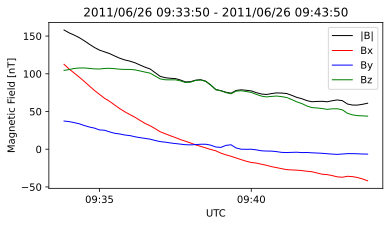

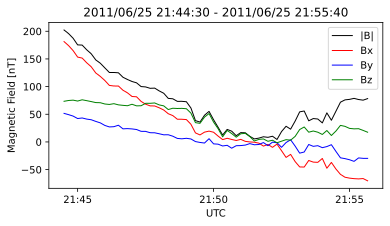

In [8]:
fig, ax = data_200.Plot(ds=ds,de=de,fsize=(6,3))
fig, ax = data_199.Plot(ds=MDUS.dip.query('orbit == 199').values[0][0],de=MDUS.dip.query('orbit == 199').values[0][1],fsize=(6,3))